# MULTIPLE LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np

# 1.Exploratory Data Analysis (EDA) & Preprocessing

In [ ]:
#Read the data
Toyota = pd.read_csv("D:\\excelr\\MLR 6\\ToyotaCorolla - MLR.csv")
Toyota.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [ ]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
#check for missing values
Toyota.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

<AxesSubplot:>

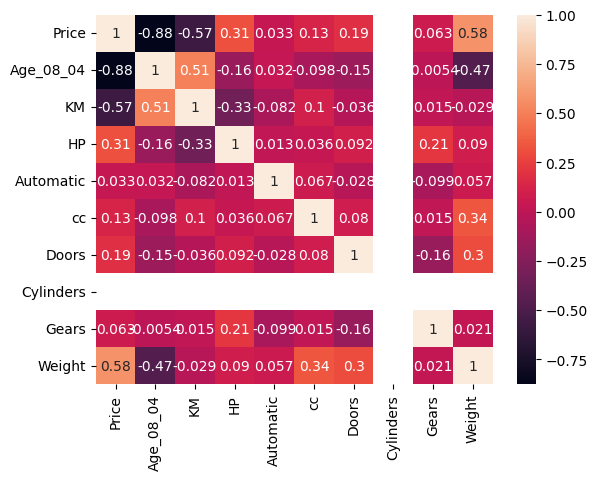

In [ ]:
import seaborn as sns
sns.heatmap(Toyota.corr(),annot=True)

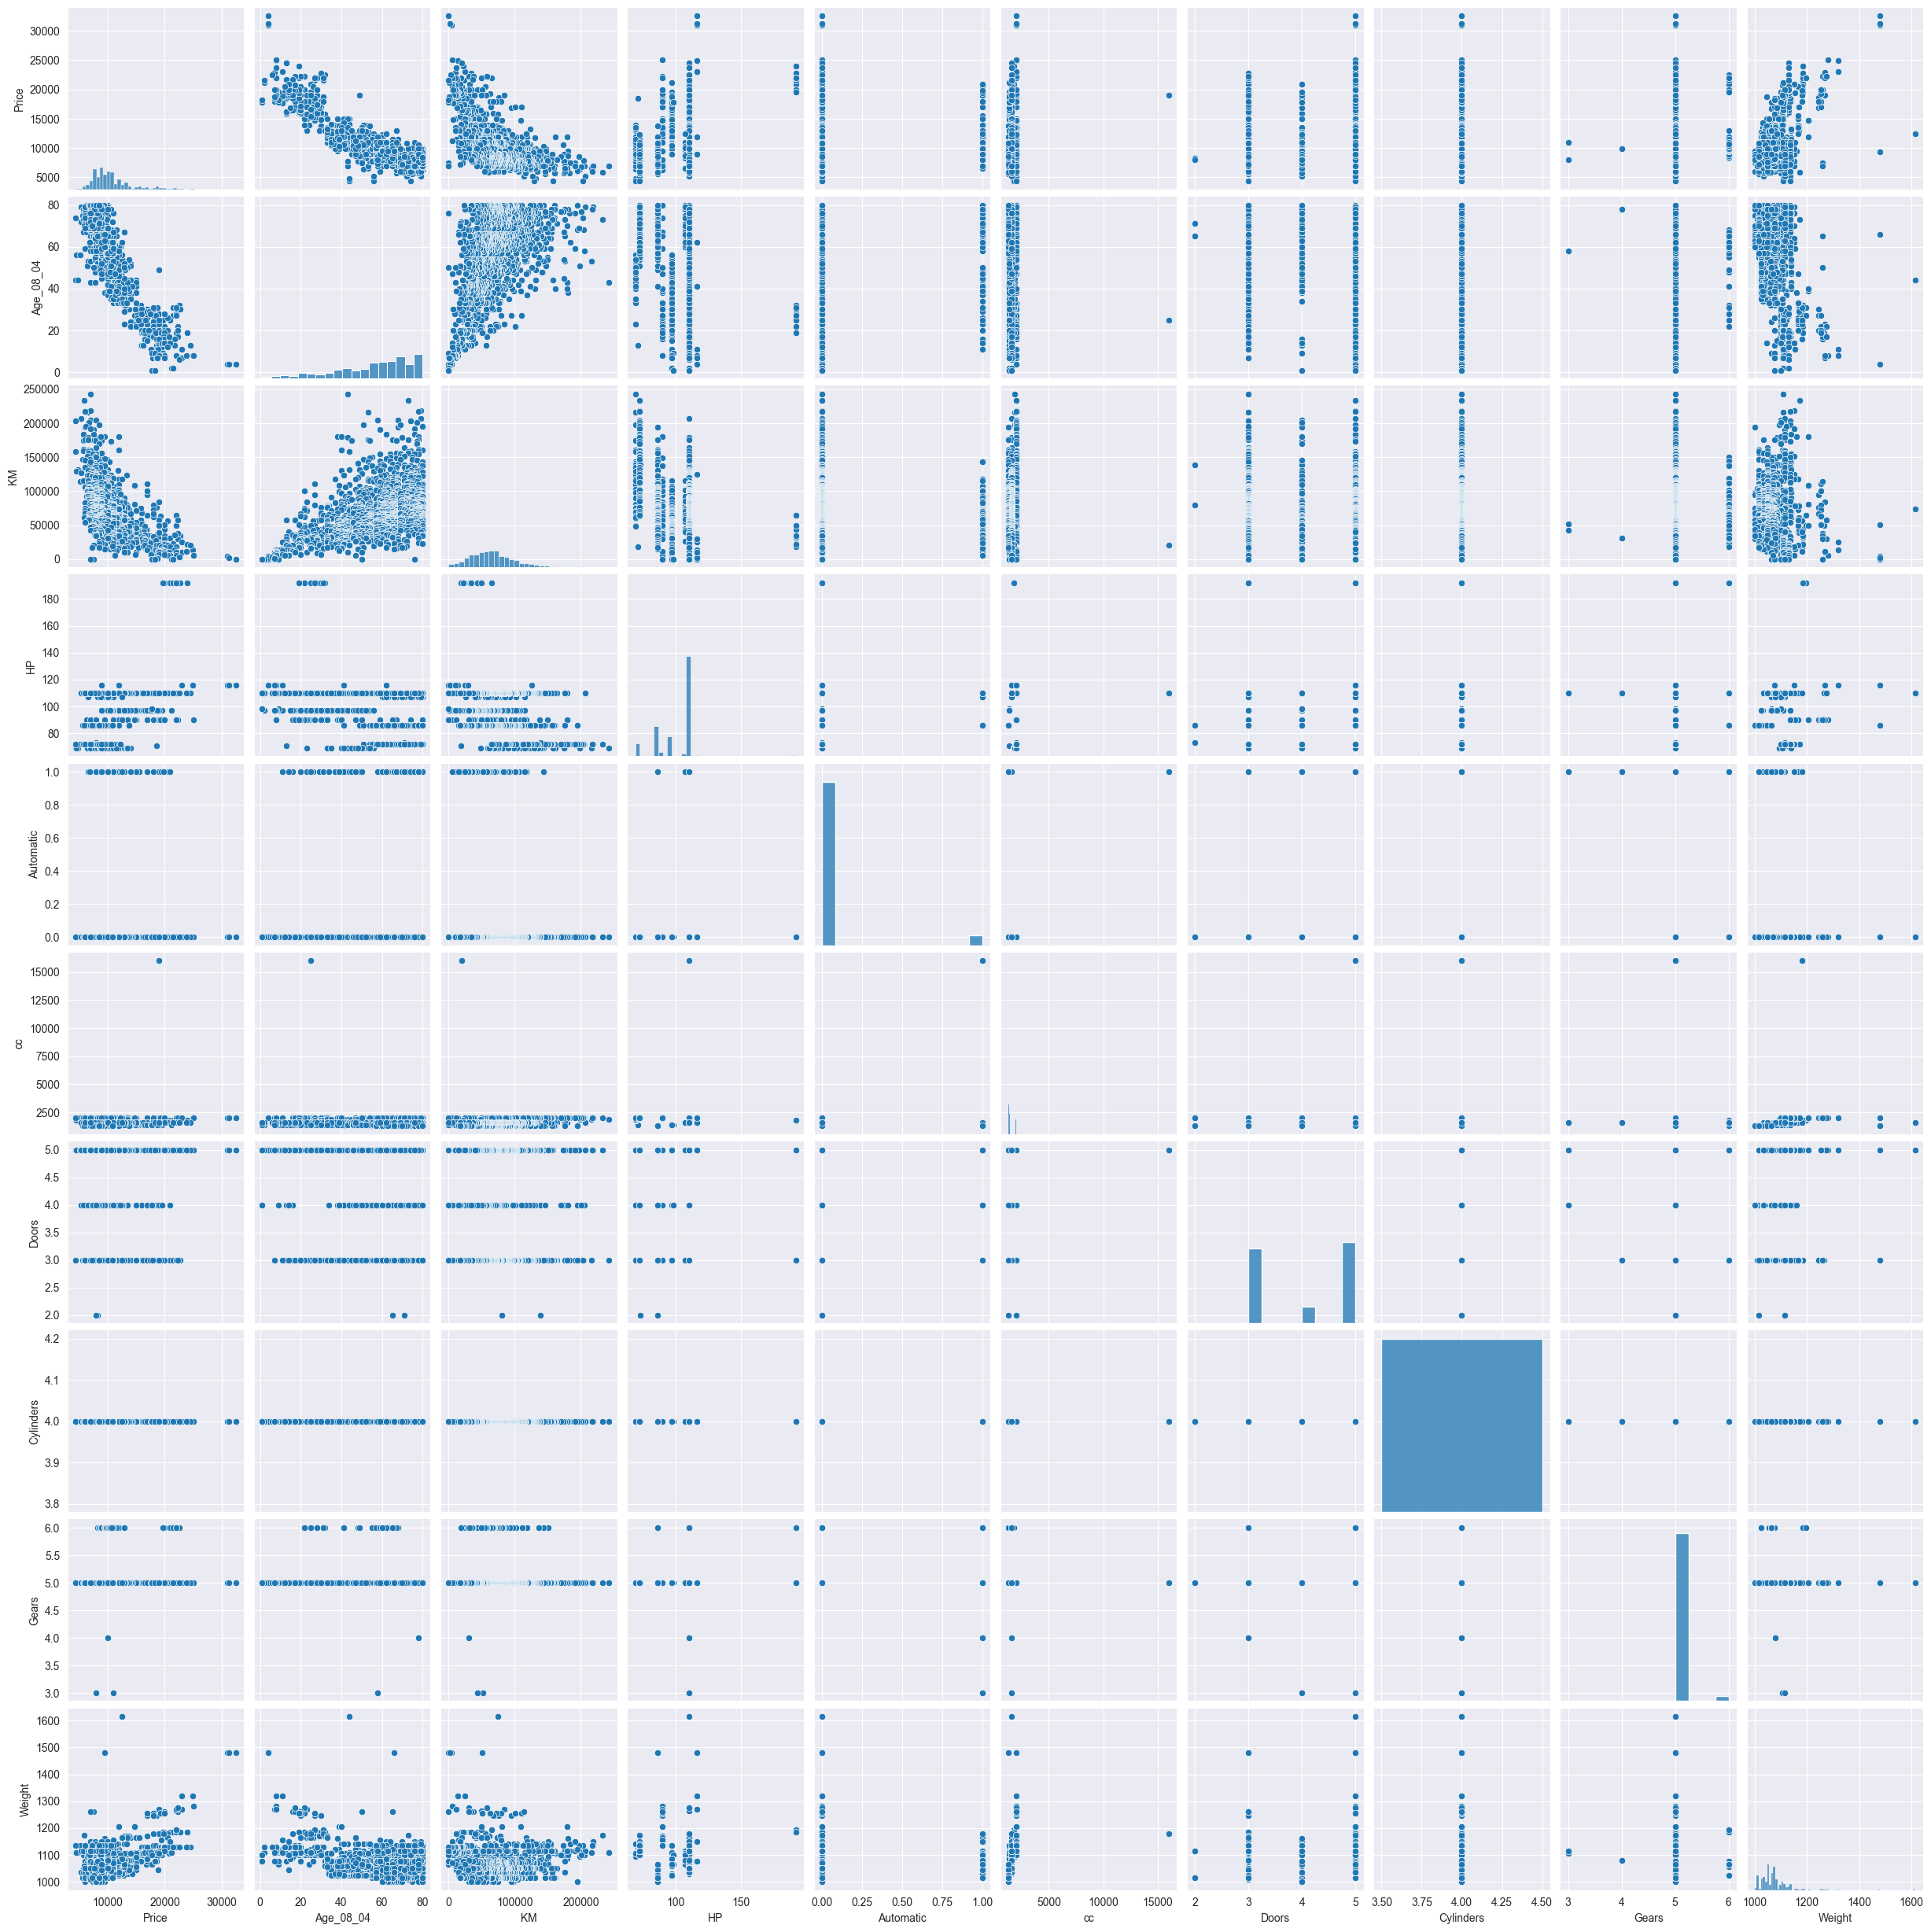

In [ ]:
import matplotlib.pyplot as plt
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Toyota)

# 2.Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
predictors = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

X = Toyota[predictors]
y = Toyota['Price']
# Suppose X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20% goes into the test set
    train_size=0.80,      # 80% goes into training
    random_state=42,      # ensures reproducible shuffling
    shuffle=True          # shuffle before splitting (default)
)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


# 3.Build a multiple linear regression model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model1 = make_pipeline(StandardScaler(), LinearRegression())
model2 = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
model3 = make_pipeline(StandardScaler(), Lasso(alpha=1.0))

model1.fit(X_train, y_train)
print(model1)
model2.fit(X_train, y_train)
print(model2)
model3.fit(X_train, y_train)
print(model3)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])
Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])


## Interpretation

In [ ]:
feature_names = X_train.columns
ridge_coefs= model2.named_steps['ridge'].coef_
lasso_coefs= model3.named_steps['lasso'].coef_
print("Ridge Regression Coefficients:")
for name,coef in zip(feature_names, ridge_coefs):
    print(f"{name:10} :{coef:.4f}")
print("\nLasso Regression Coefficients:")
for name,coef in zip(feature_names,lasso_coefs):
    print(f"{name:10}:{coef:.4f}")

Ridge Regression Coefficients:
Age_08_04  :-2350.3950
KM         :-732.6711
HP         :413.4400
Automatic  :87.4123
cc         :-27.8543
Doors      :-3.0400
Cylinders  :0.0000
Gears      :124.0381
Weight     :967.5576

Lasso Regression Coefficients:
Age_08_04 :-2353.7206
KM        :-731.1199
HP        :413.1394
Automatic :86.6435
cc        :-26.6456
Doors     :-2.0207
Cylinders :0.0000
Gears     :123.3495
Weight    :965.5307


# 4. Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
models = [model1 ,model2 ,model3]
model_names = ['Linear Regression','Ridge Regression',
             'Lasso Regression']
for i,model in enumerate(models):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    rmse = mean_squared_error(y_test,
y_pred,squared=False)
    print(f"\n{model_names[i]}")
    print("-"* 30)
    print("R^2 Score :",round(r2,4))
    print("RMSE    :",round(rmse,4))


Linear Regression
------------------------------
R^2 Score : 0.839
RMSE    : 1219.847

Ridge Regression
------------------------------
R^2 Score : 0.839
RMSE    : 1219.6629

Lasso Regression
------------------------------
R^2 Score : 0.839
RMSE    : 1219.8595


# 5.Apply Lasso and Ridge methods on the model.

In [ ]:
# Get feature names
feature_names = X_train.columns

# Get coefficients from trained models
ridge_coefs = model2.named_steps['ridge'].coef_
lasso_coefs = model3.named_steps['lasso'].coef_

# Display Ridge coefficients
print("Ridge Regression Coefficients:")
for name, coef in zip(feature_names, ridge_coefs):
    print(f"{name:10} : {coef:.4f}")

# Display Lasso coefficients
print("\nLasso Regression Coefficients:")
for name, coef in zip(feature_names, lasso_coefs):
    print(f"{name:10} : {coef:.4f}")

Ridge Regression Coefficients:
Age_08_04  : -2350.3950
KM         : -732.6711
HP         : 413.4400
Automatic  : 87.4123
cc         : -27.8543
Doors      : -3.0400
Cylinders  : 0.0000
Gears      : 124.0381
Weight     : 967.5576

Lasso Regression Coefficients:
Age_08_04  : -2353.7206
KM         : -731.1199
HP         : 413.1394
Automatic  : 86.6435
cc         : -26.6456
Doors      : -2.0207
Cylinders  : 0.0000
Gears      : 123.3495
Weight     : 965.5307


# Interview Questions:
